In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

# Reading Data


In [4]:
train_path = r'C:\projects\digit_prediction\conde_nast\dataset\train.csv'
test_path = r'C:\projects\digit_prediction\conde_nast\dataset\test.csv'

In [5]:
train_df = pd.read_csv(train_path)
print(train_df.shape)
train_df.head()

(15150, 16)


,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
0,CusID_00126,22.0,Male,Vancouver,British Columbia,4.0,2017-06-23,2021-04-01,0,2.945701,8.924431,2.000000,2.325376,1.924891,9.820254,New_UI
1,CusID_00927,NaN,Female,Budapest,Central Hungary,9.0,2018-05-21,2020-01-26,0,6.115229,2.363926,6.968752,7.355854,8.561461,2.162229,Old_UI
2,CusID_01646,26.0,Male,Mumbai,Maharashtra,NaN,2019-02-15,2020-11-28,0,1.000000,3.000000,1.766530,3.471802,0.808147,9.055563,New_UI
3,CusID_06228,NaN,Male,San Francisco,California,7.0,2019-07-18,2020-11-16,0,2.116475,9.064060,5.387599,NaN,0.459090,7.343461,New_UI
4,CusID_04239,29.0,Female,Taipei,Taiwan,NaN,2018-02-05,2020-03-12,0,7.352878,1.995744,2.676853,7.159554,8.184695,2.000000,Old_UI


In [6]:
test_df = pd.read_csv(test_path)
print(test_df.shape)
test_df.head()

(1850, 15)


,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics
0,CusID_09654,20.0,Female,Vancouver,British Columbia,5.0,2019-11-27,2020-03-22,0,4.000000,3.043023,6.231789,8.561328,9.893144,1.197478
1,CusID_09727,25.0,Not_Specified,Budapest,Central Hungary,11.0,2016-12-01,2021-08-22,1,4.379066,5.819171,6.923614,4.529057,5.105539,4.608664
2,CusID_07391,31.0,Female,Perth,Western Australia,1.0,2019-10-31,2020-11-28,1,7.946141,4.000000,9.939050,9.744879,8.874676,2.069313
3,CusID_08577,17.0,Female,Kolkata,West Bengal,7.0,2019-09-05,2021-03-20,0,8.396490,3.636100,4.170301,8.412250,9.389648,3.103196
4,CusID_08122,39.0,Male,New York City,New York,8.0,2019-07-17,2021-01-19,0,2.443467,9.143171,6.307817,3.224570,1.892078,7.298316


# Analysis

## Data Overview

In [26]:
train_df.describe()

,Age,No_of_orders_placed,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics
count,14147.000000,14377.000000,15150.000000,15150.000000,15150.000000,14215.000000,14302.000000,15150.000000,15150.000000
mean,28.356613,8.200876,0.323828,1.848024,4.464372,4.573373,4.576805,4.069482,2.830962
std,7.563249,3.606418,0.467951,12.814344,2.979838,2.628990,2.380538,3.808290,13.056017
min,15.000000,0.000000,0.000000,-99.000000,-1.000000,-3.000000,-2.000000,-20.114294,-99.000000
25%,22.000000,5.000000,0.000000,1.301135,2.019508,2.602179,2.817589,1.135181,2.472861
50%,29.000000,8.000000,0.000000,3.305220,3.603376,4.826021,4.338659,2.914518,4.602270
75%,33.000000,10.000000,1.000000,6.656113,7.595931,6.482865,6.532475,7.634503,7.872561
max,50.000000,15.000000,1.000000,9.998061,9.999751,9.997132,9.993163,26.564845,9.999038


* Missing Values in Age, No_of_orders_placed, Kid’s_Clothing, Home_&_Living
* Range of Age : (15 - 50)
* Women's, Kid's, Home&Living'S, Beauty's, Electronic's CES ranges between negative number to a max of 26.5

In [27]:
test_df.describe()

,Age,No_of_orders_placed,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics
count,1819.000000,1778.000000,1850.000000,1850.000000,1850.000000,1827.000000,1827.000000,1850.000000,1850.000000
mean,29.272128,8.242407,0.340541,4.384352,4.315254,4.945404,4.505756,4.174118,4.877670
std,8.187110,3.657581,0.474019,2.886372,2.948271,2.582262,2.643967,3.273865,2.904890
min,15.000000,0.000000,0.000000,-2.000000,-1.000000,-2.000000,-1.000000,-1.000000,-2.000000
25%,23.000000,5.000000,0.000000,2.000000,2.000000,3.000000,2.276267,1.363882,2.348540
50%,29.000000,8.000000,0.000000,3.739130,3.646886,5.073131,4.313613,3.000000,4.632417
75%,34.000000,11.000000,1.000000,6.958571,6.929417,6.920714,6.631530,7.690696,7.533786
max,50.000000,15.000000,1.000000,9.991346,9.998916,9.995912,9.989994,9.999745,9.997705


* Missing Values in Age, No_of_orders_placed, Kid’s_Clothing, Home_&_Living
* Range of Age : (15 - 50)
* Women's, Kid's, Home&Living'S, Beauty's, Electronic's CES ranges between negative numbers -99 to a max of 10

In [17]:
cust_ids = pd.DataFrame(train_df['CustomerID'].value_counts())
cust_ids[cust_ids['CustomerID'] > 1]

,CustomerID
CusID_03946,24
CusID_06118,23
CusID_09342,22
CusID_08240,21
CusID_01697,21
...,...
CusID_01226,2
CusID_09720,2
CusID_08923,2
CusID_05807,2


In [18]:
train_df[train_df['CustomerID'] == 'CusID_03946']

,CustomerID,Age,Gender,City,State,No_of_orders_placed,Sign_up_date,Last_order_placed_date,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme
4572,CusID_03946,28.0,Female,Munich,Bavaria,9.0,2017-03-30,2021-01-22,0,9.862974,0.585767,7.758167,8.357562,2.000000,0.613109,Old_UI
8307,CusID_03946,36.0,Male,Taipei,England,7.0,2018-07-17,2021-06-28,0,0.916328,6.266816,7.410721,4.112618,0.250892,1.962318,New_UI
8572,CusID_03946,27.0,Female,Vancouver,Tuscany,12.0,2018-07-20,2021-09-02,1,1.158384,0.614670,4.935591,4.760135,0.459547,4.053602,New_UI
8705,CusID_03946,19.0,Female,Vancouver,New South Wales,9.0,2016-02-26,2021-12-10,0,1.439141,1.619540,5.556449,6.687981,15.749622,6.601435,Old_UI
8799,CusID_03946,31.0,Female,Perth,British Columbia,4.0,2018-02-25,2020-04-18,0,7.023964,1.717900,4.897106,7.352134,8.149748,2.748126,New_UI
8808,CusID_03946,25.0,Female,Budapest,California,4.0,2019-12-05,2021-03-15,0,6.635891,1.006558,8.973741,6.330489,8.200965,3.072037,Old_UI
9122,CusID_03946,32.0,Female,Berlin,Bavaria,4.0,2018-01-25,2020-07-29,1,5.978580,2.524953,8.893667,7.176628,8.048416,3.839864,Old_UI
9129,CusID_03946,33.0,Not_Specified,Vancouver,West Bengal,14.0,2016-11-26,2021-10-13,1,7.984146,2.343965,2.530758,4.356719,3.145453,5.162902,New_UI
9630,CusID_03946,26.0,Female,Munich,Western Australia,6.0,2019-10-07,2021-02-20,0,-66.000000,0.722800,NaN,7.029419,8.948479,2.471173,Old_UI
9795,CusID_03946,19.0,Female,San Francisco,Tamil Nadu,8.0,2018-12-26,2021-04-26,0,7.477081,1.776685,4.548691,6.408706,7.730308,1.996382,New_UI


* We can see that information for same customer ids, the age ( an year change of signup date but age changes by multiple years), gender, city and state changes everytime
 which is not practically possible. Hence we'll treat each of users info record as unique i.e., will not use custid for training or feature engineering. 

## Data Relations

### Univariate Analysis
* Distribution of data
     Graphical Method: histogram, QQplot
Although Statistical Method like  Shapiro milk test can be used for testing normality of data,
 the test will be much useful for testing normality on subsamples of the data.


In [91]:
analysis_df  = train_df.copy()

9


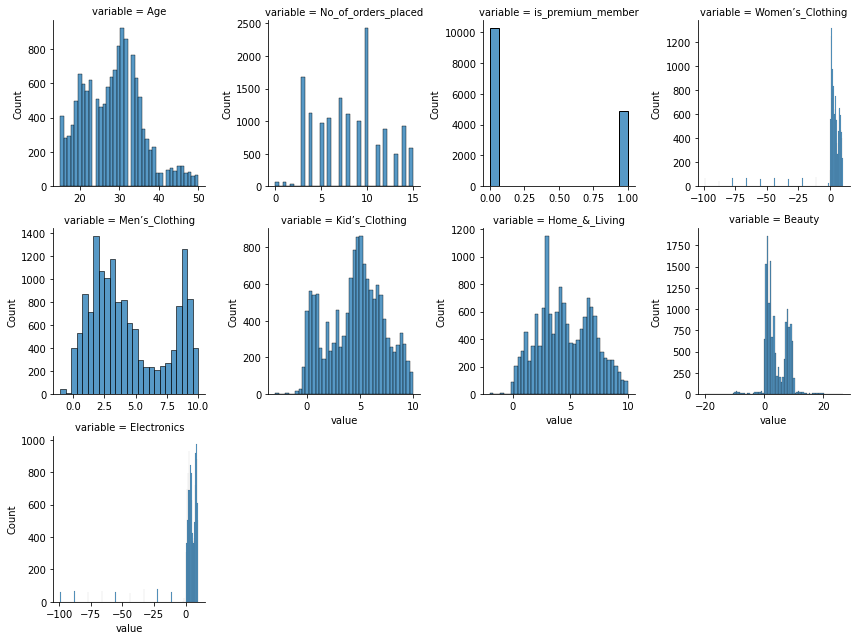

In [49]:
cols = [i for i in analysis_df.columns if analysis_df[i].dtype!=object]
print(len(cols))
nd = pd.melt(analysis_df, value_vars =cols)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)

n1.map(sns.histplot, "value")
plt.show()

* clearly, the is_premium_member is a cardinal value
* The age and no_of_order_placed cannot be treated as cardinal values as their range can change over time.


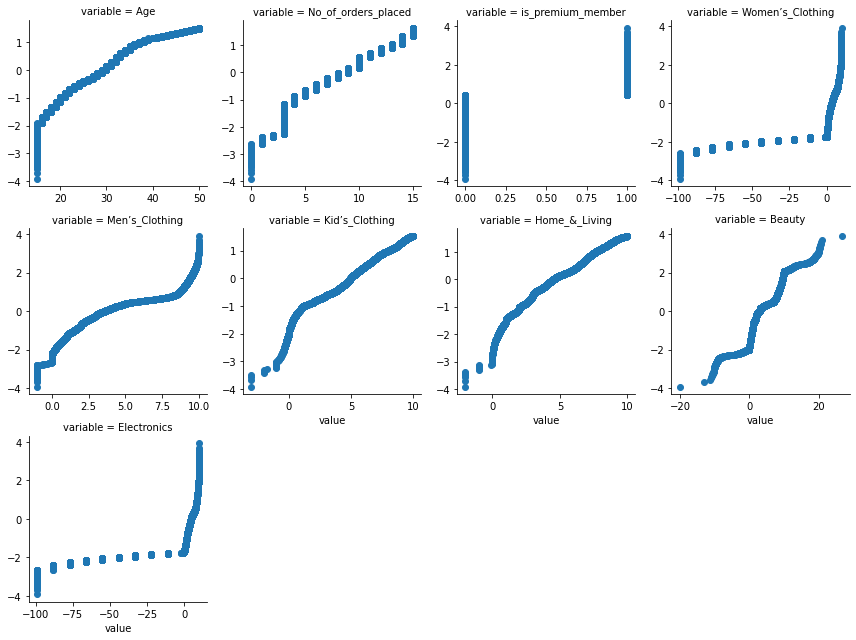

In [57]:
cols = [i for i in analysis_df.columns if analysis_df[i].dtype!=object]
nd = pd.melt(analysis_df, value_vars =cols)
n1 = sns.FacetGrid (nd, col='variable', col_wrap=4, sharex=False, sharey = False)

from scipy import stats
def quantile_plot(x, **kwargs):
    quantiles, xr = stats.probplot(x, fit=False)
    plt.scatter(xr, quantiles, **kwargs)

n1.map(quantile_plot, "value")

* We can observe that none of the continous feature follows normal distribution(which is natural),
 hence we'll require to apply transformation before using this data with models using normal distribution of data assumptions.

<AxesSubplot:xlabel='Preferred_Theme', ylabel='Count'>

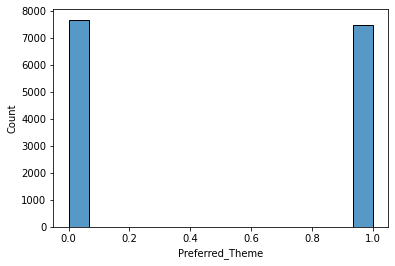

In [52]:
target  = {
    'New_UI':0,
    'Old_UI':1
}
sns.histplot(analysis_df['Preferred_Theme'].apply(lambda x: target[x]))

* The target variable is a balanced binary classification, with almost equal number of records for both the case.

<AxesSubplot:xlabel='variable', ylabel='value'>

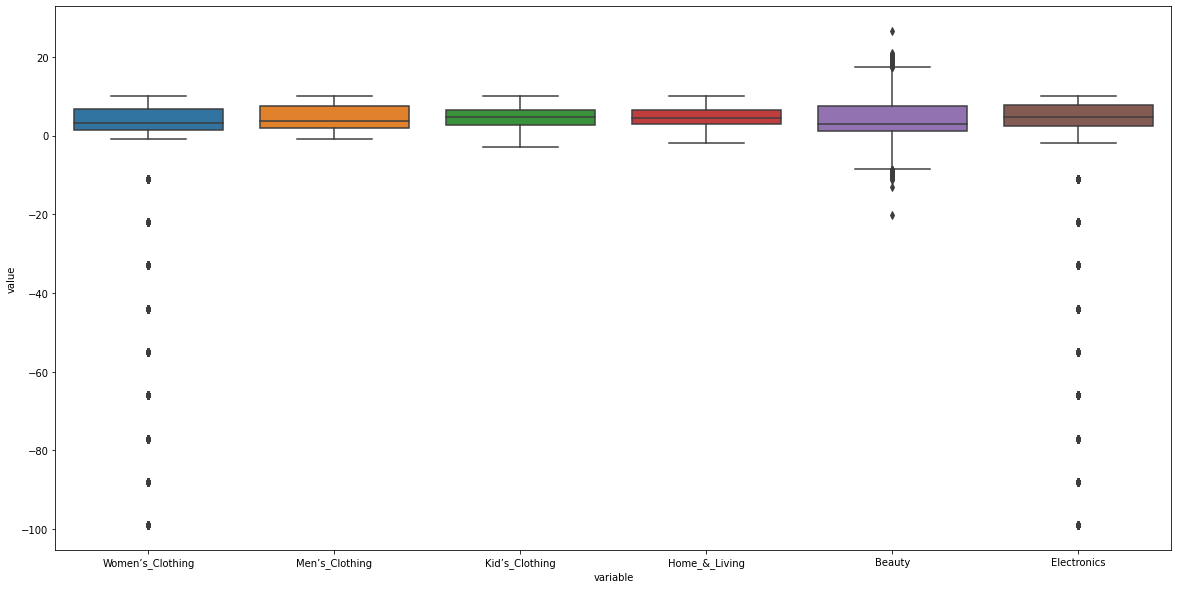

In [56]:
plt.figure(figsize=(20,10))
dataset = analysis_df[['Women’s_Clothing',	'Men’s_Clothing',	'Kid’s_Clothing',	'Home_&_Living',	'Beauty',	'Electronics']]

sns.boxplot(x="variable", y="value", data=pd.melt(dataset))

* We can see a lot of outliers in the Women's_Clothing, Electronics and Beauty which are responsible for skewnwess in the distribution of the dataset.

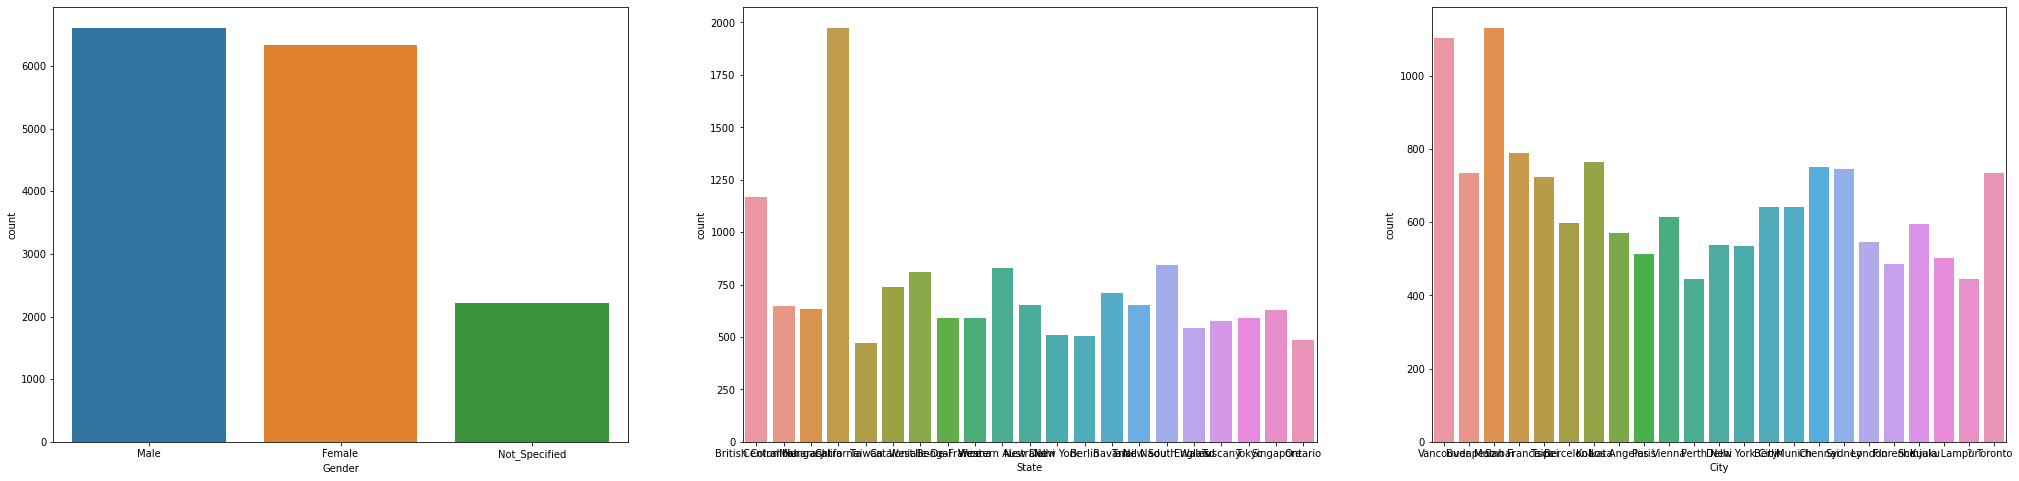

In [66]:
fig, axs = plt.subplots(ncols=3,figsize=(35,8))
# plt.figure()
sns.countplot(x = analysis_df['Gender'],ax=axs[0])
sns.countplot(x = analysis_df['State'],ax=axs[1])
sns.countplot(x = analysis_df['City'],ax=axs[2])
fig.show()

### Multivariate Analysis
Statistical Test:
* chi-square test for relation between two categorical features.
* Logistic Regression test for relation between multiple variables.

Graphical Tests:
* Bar charts for relation between two categorical features.
* Correlation Heatmap for relation between coefficients of continous variables.
* Linear Regression for realtion between two or more continous variables.

Although certain non parametric test such as spearman's, kendall's  rank correlation (for non normal data) can be used 
to test relation between 2 continous variables, that would be more significant if the subsamples of dataset are considered.


In [62]:

from scipy.stats import chi2_contingency
from scipy.stats import chi2

def chi_test(crosstab):
    stat, p, dof, expected = chi2_contingency(crosstab)
    print('Degress of freedom = %d' % dof)

    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('probability=%.3f, critical=%.3f, stat=%.3f' % (prob, critical, stat))

    if abs(stat) >= critical:
        print('Dependent (We reject H0)')
    else:
        print('Independent (We fail to reject H0)')
    alpha = 1.0 - prob
    print('significance=%.3f, p=%.3f' % (alpha, p))
    if p <= alpha:
        print('Dependent (We reject H0)')
    else:
        print('Independent (We fail to reject H0)')

Degress of freedom = 2
probability=0.950, critical=5.991, stat=1648.654
Dependent (We reject H0)
significance=0.050, p=0.000
Dependent (We reject H0)


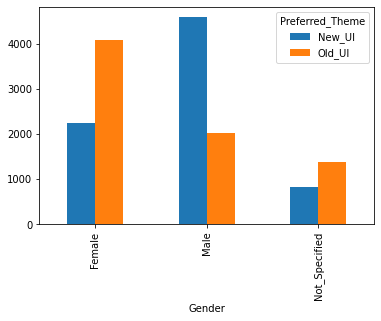

In [63]:
crosstab = pd.crosstab(analysis_df["Gender"], analysis_df["Preferred_Theme"])
chi_test(crosstab)
crosstab.plot(kind="bar")
plt.show()


* Since p-value is less than 0.05 we reject H0 and conclude that
there is a relation between the gender and the theme preferrred.

Degress of freedom = 20
probability=0.950, critical=31.410, stat=543.987
Dependent (We reject H0)
significance=0.050, p=0.000
Dependent (We reject H0)


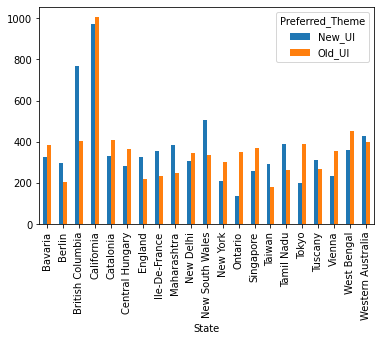

In [68]:
crosstab = pd.crosstab(analysis_df["State"], analysis_df["Preferred_Theme"])
chi_test(crosstab)
crosstab.plot(kind="bar")
plt.show()


Degress of freedom = 22
probability=0.950, critical=33.924, stat=656.529
Dependent (We reject H0)
significance=0.050, p=0.000
Dependent (We reject H0)


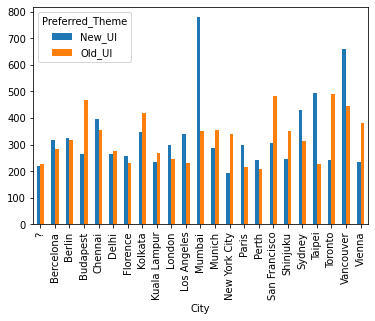

In [69]:
crosstab = pd.crosstab(analysis_df["City"], analysis_df["Preferred_Theme"])
chi_test(crosstab)
crosstab.plot(kind="bar")
plt.show()


* Although we can see more users from california have an equal taste for preferred theme (could also be because of the no of consumers),
Mumbai can be seen to have higher and unequal ratio preferred theme.
* Therefore We'll choose one of the state or city for modelling. 

In [92]:

analysis_df['cust_age'] = pd.to_datetime(analysis_df['Last_order_placed_date'] ,format='%Y-%m-%d',errors='coerce') - pd.to_datetime(analysis_df['Sign_up_date'] ,format='%Y-%m-%d',errors='coerce')
analysis_df['cust_age'] = analysis_df['cust_age'].dt.days

In [93]:
analysis_df.drop(['CustomerID','Sign_up_date',	'Last_order_placed_date', 'City'],axis=1,inplace=True)
analysis_df.head()

,Age,Gender,State,No_of_orders_placed,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme,cust_age
0,22.0,Male,British Columbia,4.0,0,2.945701,8.924431,2.000000,2.325376,1.924891,9.820254,New_UI,1378.0
1,NaN,Female,Central Hungary,9.0,0,6.115229,2.363926,6.968752,7.355854,8.561461,2.162229,Old_UI,615.0
2,26.0,Male,Maharashtra,NaN,0,1.000000,3.000000,1.766530,3.471802,0.808147,9.055563,New_UI,652.0
3,NaN,Male,California,7.0,0,2.116475,9.064060,5.387599,NaN,0.459090,7.343461,New_UI,487.0
4,29.0,Female,Taiwan,NaN,0,7.352878,1.995744,2.676853,7.159554,8.184695,2.000000,Old_UI,766.0


In [94]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
import statsmodels.api as sm
analysis_df_  = analysis_df.copy()
analysis_df_.dropna(inplace=True)
gender = pd.get_dummies(analysis_df_['Gender'],drop_first=True)
state = pd.get_dummies(analysis_df_['State'],drop_first=True)
analysis_df_ = analysis_df_.drop(['Gender','State'],axis=1)
analysis_df_ = pd.concat([analysis_df_,state,gender],axis=1)
target = {
    'New_UI':0,
    'Old_UI':1
}
analysis_df_['Preferred_Theme'] = analysis_df_['Preferred_Theme'].apply(lambda x: target[x])
X = analysis_df_.drop(['Preferred_Theme'],axis=1)

y = analysis_df_['Preferred_Theme']
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns = X.columns)
log_reg = sm.Logit(y, X).fit()
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.590604
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        Preferred_Theme   No. Observations:                11847
Model:                          Logit   Df Residuals:                    11815
Method:                           MLE   Df Model:                           31
Date:                Sun, 17 Apr 2022   Pseudo R-squ.:                  0.1478
Time:                        21:46:37   Log-Likelihood:                -6996.9
converged:                       True   LL-Null:                       -8210.5
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Age                     0.0150      0.003      5.688      0.000       0.010       0.020
No

In [95]:
import numpy as np
params = log_reg.params
conf = log_reg.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
print(np.exp(conf))

                           5%       95%  Odds Ratio
Age                  1.009866  1.020346    1.015093
No_of_orders_placed  1.054027  1.080745    1.067302
is_premium_member    1.754708  2.170710    1.951656
Women’s_Clothing     0.993611  0.999832    0.996716
Men’s_Clothing       0.949652  0.984368    0.966854
Kid’s_Clothing       1.062530  1.100976    1.081582
Home_&_Living        0.965363  1.008133    0.986516
Beauty               0.985678  1.011742    0.998625
Electronics          0.997503  1.003731    1.000612
cust_age             0.999836  1.000003    0.999919
Berlin               0.237288  0.407571    0.310985
British Columbia     0.339862  0.526288    0.422925
California           0.513983  0.754564    0.622762
Catalonia            0.511160  0.824199    0.649074
Central Hungary      0.535374  0.875323    0.684562
England              0.263651  0.449220    0.344147
Ile-De-France        0.286746  0.481365    0.371524
Maharashtra          0.233788  0.386403    0.300560
New Delhi   

  * All the feature with p-value <0.05, have association with target variable.
  * Increase in Age have very less or slight effect the change in Outcome (Odds Ratio ~1)
  * All the Odds Ratio <1 shows that the event is less likely to occur (Preferred_Theme = 1 or old_ui)
  * For ex: As the is_premium_member(coded 0=Presence, 1=Absence) is 1, the Odds of Preferred_Theme(to be 1 or old_ui) is less likey by 95%.
  * The new cust_age feature seems to be useful.
 * Here the Pseudo R-squ. will be useful for comparison with different models.


In [98]:
analysis_df_.columns

Index(['Age', 'No_of_orders_placed', 'is_premium_member', 'Women’s_Clothing',
       'Men’s_Clothing', 'Kid’s_Clothing', 'Home_&_Living', 'Beauty',
       'Electronics', 'Preferred_Theme', 'cust_age', 'Berlin',
       'British Columbia', 'California', 'Catalonia', 'Central Hungary',
       'England', 'Ile-De-France', 'Maharashtra', 'New Delhi',
       'New South Wales', 'New York', 'Ontario', 'Singapore', 'Taiwan',
       'Tamil Nadu', 'Tokyo', 'Tuscany', 'Vienna', 'West Bengal',
       'Western Australia', 'Male', 'Not_Specified'],
      dtype='object')

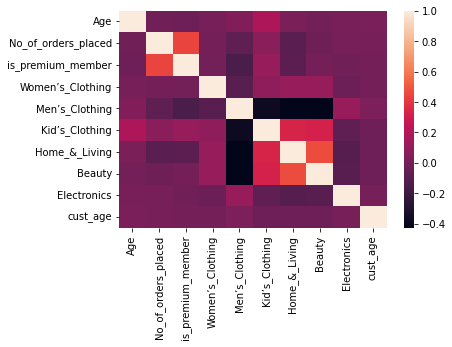

In [97]:
sns.heatmap(analysis_df.corr())
plt.show()

* The heatmap shows the correlation coefficient for the two variables, i.e., change in the coefficient(or sign) of one varaiable with an increase or decrease in other variable.
* We can see that Men's clothing is highly correlated to Kid's , Home, beauty ces.
* is_premium_menber is correlated to the no of orders placed.
Hence we can drop few of the these correlated features.

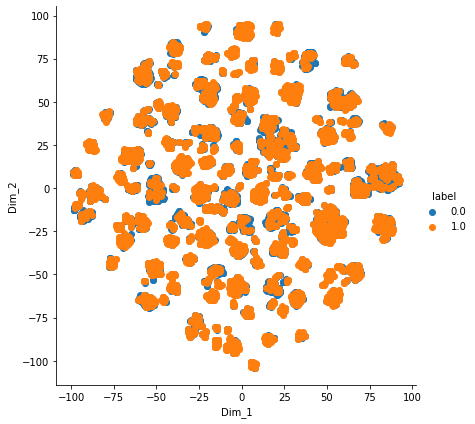

In [316]:
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
X  = analysis_df_.drop('Preferred_Theme',axis=1)
y = analysis_df_['Preferred_Theme']
model = TSNE(n_components = 2, random_state = 0)
scaler = StandardScaler()
tsne_data = model.fit_transform(scaler.fit_transform(X))
 
# creating a new data frame which
# help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, y)).T
tsne_df = pd.DataFrame(data = tsne_data,
     columns =("Dim_1", "Dim_2", "label"))
 
# Ploting the result of tsne
sns.FacetGrid(tsne_df, hue ="label", size = 6).map(
       plt.scatter, 'Dim_1', 'Dim_2').add_legend()
 
plt.show()

* labels could'nt be easily categorised by tsne with pca.

## Preprocessing

a) Customer Engagement score of individual product is calculated as : ∑w*n

    * w is the weight for product (0-10, as per instructions)

    * n is the number of times the event (visited,used,commented) occured.

    The final score can occur outside of range of weights  i.e., it could be negative or more than 10

    * The scores are then normalised to a scale.

    Since the scores range (for the features) is not in the specified range (0-10); Following assumptions are concluded

    1) Dropping records with values outiside of engagement score range.

        This would mean losing ~24% of training data, moreover the test dataset also includes negative scores.

    2) Changing scale of scores by adjusting to (0-10) using the formula

            ( (x - old_min) / (old_max - old_min) ) * (new_max - new_min) + new_min

        But this might be a problem if holding negative info is important. 

    3) Creating Bins for the engagement score.

        As a commonly used strategy , ces can be categorised as follows:

        =<0  : under_risk

        1-3  : very_disengaged

        4-6  : somewhat_engaged

        7-9  : highly_engaged

        >=10 : power

b) The age of customer can be calculated as:

    Last_order_placed_date - Sign_up_date

    * The date features will then be dropped
    
c) The State and City combined doesnot seem to add value for predicting UI Theme, hence state feature will be retained since it has no null values.

d) The no_of_order_placed is correlated with is_premium_member and can also be defined with ces, hence will be dropped.


In [238]:
new_train = train_df.copy()
new_test  = test_df.copy()

In [239]:
### Binning
def bin_scores(x):
    if x<=0:
        return "under_risk"
    elif x>0 and x<=3:
        return "very_disengaged"
    elif x>3 and x<=6:
        return "somewhat_engaged"
    elif x>6 and x<=9:
        return "highly_engaged"
    elif x>9:
        return "power_users"
    else: # null values
        return x

In [240]:
new_train["Women’s_Clothing"] = new_train["Women’s_Clothing"].apply(lambda x: bin_scores(x))
new_train["Men’s_Clothing"] = new_train["Men’s_Clothing"].apply(lambda x: bin_scores(x))
new_train["Kid’s_Clothing"] = new_train["Kid’s_Clothing"].apply(lambda x: bin_scores(x))
new_train["Home_&_Living"] = new_train["Home_&_Living"].apply(lambda x: bin_scores(x))
new_train["Beauty"] = new_train["Beauty"].apply(lambda x: bin_scores(x))
new_train["Electronics"] = new_train["Electronics"].apply(lambda x: bin_scores(x))


new_test["Women’s_Clothing"] = new_test["Women’s_Clothing"].apply(lambda x: bin_scores(x))
new_test["Men’s_Clothing"] = new_test["Men’s_Clothing"].apply(lambda x: bin_scores(x))
new_test["Kid’s_Clothing"] = new_test["Kid’s_Clothing"].apply(lambda x: bin_scores(x))
new_test["Home_&_Living"] = new_test["Home_&_Living"].apply(lambda x: bin_scores(x))
new_test["Beauty"] = new_test["Beauty"].apply(lambda x: bin_scores(x))
new_test["Electronics"] = new_test["Electronics"].apply(lambda x: bin_scores(x))

In [241]:
new_test.columns

Index(['CustomerID', 'Age', 'Gender', 'City', 'State', 'No_of_orders_placed',
       'Sign_up_date', 'Last_order_placed_date', 'is_premium_member',
       'Women’s_Clothing', 'Men’s_Clothing', 'Kid’s_Clothing', 'Home_&_Living',
       'Beauty', 'Electronics'],
      dtype='object')

In [242]:
cols = ['Women’s_Clothing',
       'Men’s_Clothing', 'Kid’s_Clothing', 'Home_&_Living', 'Beauty',
       'Electronics']
for i in cols:
    print(new_train[i].unique() )

['very_disengaged' 'highly_engaged' 'somewhat_engaged' 'under_risk'
 'power_users']
['highly_engaged' 'very_disengaged' 'power_users' 'somewhat_engaged'
 'under_risk']
['very_disengaged' 'highly_engaged' 'somewhat_engaged' nan 'power_users'
 'under_risk']
['very_disengaged' 'highly_engaged' 'somewhat_engaged' nan 'power_users'
 'under_risk']
['very_disengaged' 'highly_engaged' 'somewhat_engaged' 'under_risk'
 'power_users']
['power_users' 'very_disengaged' 'highly_engaged' 'somewhat_engaged'
 'under_risk']


In [243]:

new_train['cust_age'] = pd.to_datetime(new_train['Last_order_placed_date'] ,format='%Y-%m-%d',errors='coerce') - pd.to_datetime(new_train['Sign_up_date'] ,format='%Y-%m-%d',errors='coerce')
new_train['cust_age'] = new_train['cust_age'].dt.days




new_test['cust_age'] = pd.to_datetime(new_test['Last_order_placed_date'] ,format='%Y-%m-%d',errors='coerce') - pd.to_datetime(new_test['Sign_up_date'] ,format='%Y-%m-%d',errors='coerce')
new_test['cust_age'] = new_test['cust_age'].dt.days

In [244]:
new_train.drop(['Last_order_placed_date','Sign_up_date','CustomerID','City'],axis=1,inplace=True) # dropping City since it has null values

test_ids = new_test['CustomerID']
new_test.drop(['Last_order_placed_date','Sign_up_date','CustomerID','City'],axis=1,inplace=True) # dropping City since it has null values

In [245]:
new_train.head()

,Age,Gender,State,No_of_orders_placed,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,Preferred_Theme,cust_age
0,22.0,Male,British Columbia,4.0,0,very_disengaged,highly_engaged,very_disengaged,very_disengaged,very_disengaged,power_users,New_UI,1378.0
1,NaN,Female,Central Hungary,9.0,0,highly_engaged,very_disengaged,highly_engaged,highly_engaged,highly_engaged,very_disengaged,Old_UI,615.0
2,26.0,Male,Maharashtra,NaN,0,very_disengaged,very_disengaged,very_disengaged,somewhat_engaged,very_disengaged,power_users,New_UI,652.0
3,NaN,Male,California,7.0,0,very_disengaged,power_users,somewhat_engaged,NaN,very_disengaged,highly_engaged,New_UI,487.0
4,29.0,Female,Taiwan,NaN,0,highly_engaged,very_disengaged,very_disengaged,highly_engaged,highly_engaged,very_disengaged,Old_UI,766.0


* It can be seen that when Men's clothing is disengaging, the other scores are usually highly or somewhat engaged (Due to gender)
* Gender can play a major role in filling null values for ces.

##### null value treatment

In [246]:
new_train.isnull().sum()

Age                    1003
Gender                    0
State                     0
No_of_orders_placed     773
is_premium_member         0
Women’s_Clothing          0
Men’s_Clothing            0
Kid’s_Clothing          935
Home_&_Living           848
Beauty                    0
Electronics               0
Preferred_Theme           0
cust_age                154
dtype: int64

In [247]:
def missing_percentage(ser:pd.Series,col_name:str):
    print(f"Missing values percentage in {col_name}: ",ser.isnull().sum() * 100 / len(ser))
print("Train Data")
missing_percentage(new_train['Age'],'age')
missing_percentage(new_train['cust_age'],'cust_age')
missing_percentage(new_train['Kid’s_Clothing'],'Kid’s_Clothing')
missing_percentage(new_train['Home_&_Living'],'Home_&_Living')

print("test Data")
missing_percentage(new_test['Age'],'age')
missing_percentage(new_test['cust_age'],'cust_age')
missing_percentage(new_test['Kid’s_Clothing'],'Kid’s_Clothing')
missing_percentage(new_test['Home_&_Living'],'Home_&_Living')

Train Data
Missing values percentage in age:  6.62046204620462
Missing values percentage in cust_age:  1.0165016501650166
Missing values percentage in Kid’s_Clothing:  6.1716171617161715
Missing values percentage in Home_&_Living:  5.597359735973598
test Data
Missing values percentage in age:  1.6756756756756757
Missing values percentage in cust_age:  1.1891891891891893
Missing values percentage in Kid’s_Clothing:  1.2432432432432432
Missing values percentage in Home_&_Living:  1.2432432432432432


In [248]:
gender  = pd.get_dummies(new_train['Gender'],drop_first=True)
state  = pd.get_dummies(new_train['State'],drop_first=True)
women = pd.get_dummies(new_train['Women’s_Clothing'],drop_first=True)
men = pd.get_dummies(new_train['Men’s_Clothing'],drop_first=True)
kids = pd.get_dummies(new_train['Kid’s_Clothing'],drop_first=True)
home = pd.get_dummies(new_train['Home_&_Living'],drop_first=True)
elect = pd.get_dummies(new_train['Electronics'],drop_first=True)
beauty = pd.get_dummies(new_train['Beauty'],drop_first=True)

new_train_  = new_train.drop([ 'Gender', 'State', 'Women’s_Clothing',
       'Men’s_Clothing', 'Kid’s_Clothing', 'Home_&_Living', 'Beauty',
       'Electronics',],axis=1)
new_train_ = pd.concat([new_train_,gender,state,women,men,kids,home,elect,beauty],axis=1)
new_train_.head()


gender  = pd.get_dummies(new_test['Gender'],drop_first=True)
state  = pd.get_dummies(new_test['State'],drop_first=True)
women = pd.get_dummies(new_test['Women’s_Clothing'],drop_first=True)
men = pd.get_dummies(new_test['Men’s_Clothing'],drop_first=True)
kids = pd.get_dummies(new_test['Kid’s_Clothing'],drop_first=True)
home = pd.get_dummies(new_test['Home_&_Living'],drop_first=True)
elect = pd.get_dummies(new_test['Electronics'],drop_first=True)
beauty = pd.get_dummies(new_test['Beauty'],drop_first=True)

new_test_  = new_test.drop([ 'Gender', 'State', 'Women’s_Clothing',
       'Men’s_Clothing', 'Kid’s_Clothing', 'Home_&_Living', 'Beauty',
       'Electronics',],axis=1)
new_test_ = pd.concat([new_test_,gender,state,women,men,kids,home,elect,beauty],axis=1)
new_test_.head()

,Age,No_of_orders_placed,is_premium_member,cust_age,Male,Not_Specified,Berlin,British Columbia,California,Catalonia,...,under_risk,very_disengaged,power_users,somewhat_engaged,under_risk,very_disengaged,power_users,somewhat_engaged,under_risk,very_disengaged
0,20.0,5.0,0,116.0,0,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
1,25.0,11.0,1,1725.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,31.0,1.0,1,394.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,17.0,7.0,0,562.0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4,39.0,8.0,0,552.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


#### train test split
Testing data set will be chosen from non null values with stratification

In [249]:
X = new_train_.dropna()
X.shape

(13308, 51)

In [ ]:

new_train['cust_age'] = pd.to_datetime(new_train['Last_order_placed_date'] ,format='%Y-%m-%d',errors='coerce') - pd.to_datetime(new_train['Sign_up_date'] ,format='%Y-%m-%d',errors='coerce')
new_train['cust_age'] = new_train['cust_age'].dt.days




new_test['cust_age'] = pd.to_datetime(new_test['Last_order_placed_date'] ,format='%Y-%m-%d',errors='coerce') - pd.to_datetime(new_test['Sign_up_date'] ,format='%Y-%m-%d',errors='coerce')
new_test['cust_age'] = new_test['cust_age'].dt.days

In [250]:
y = X['Preferred_Theme']
X = X.drop('Preferred_Theme',axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.25)
test_data = pd.concat([x_test,y_test],axis=1) # test data without null values or treated null values
train_split = new_train_.drop(test_data.index,axis=0)
train_split.head()
x_train  = train_split.drop('Preferred_Theme',axis=1)
y_train  = train_split['Preferred_Theme']

Missing imputation with kmeans

In [257]:
x_train.columns

Index(['Age', 'No_of_orders_placed', 'is_premium_member', 'cust_age', 'Male',
       'Not_Specified', 'Berlin', 'British Columbia', 'California',
       'Catalonia', 'Central Hungary', 'England', 'Ile-De-France',
       'Maharashtra', 'New Delhi', 'New South Wales', 'New York', 'Ontario',
       'Singapore', 'Taiwan', 'Tamil Nadu', 'Tokyo', 'Tuscany', 'Vienna',
       'West Bengal', 'Western Australia', 'power_users', 'somewhat_engaged',
       'under_risk', 'very_disengaged', 'power_users', 'somewhat_engaged',
       'under_risk', 'very_disengaged', 'power_users', 'somewhat_engaged',
       'under_risk', 'very_disengaged', 'power_users', 'somewhat_engaged',
       'under_risk', 'very_disengaged', 'power_users', 'somewhat_engaged',
       'under_risk', 'very_disengaged', 'power_users', 'somewhat_engaged',
       'under_risk', 'very_disengaged'],
      dtype='object')

In [258]:
from sklearn.impute import SimpleImputer , KNNImputer
imputer = KNNImputer()
X = imputer.fit_transform(x_train)
X = pd.DataFrame(data=X,columns = x_train.columns)
X.head()

,Age,No_of_orders_placed,is_premium_member,cust_age,Male,Not_Specified,Berlin,British Columbia,California,Catalonia,...,under_risk,very_disengaged,power_users,somewhat_engaged,under_risk,very_disengaged,power_users,somewhat_engaged,under_risk,very_disengaged
0,24.0,9.0,0.0,615.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,26.0,8.2,0.0,652.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,32.6,7.0,0.0,487.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,29.0,7.0,0.0,766.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28.0,15.0,1.0,757.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [259]:
X_test = imputer.transform(new_test_)
X_test = pd.DataFrame(data=X_test,columns = new_test_.columns)
X_test.head()

,Age,No_of_orders_placed,is_premium_member,cust_age,Male,Not_Specified,Berlin,British Columbia,California,Catalonia,...,under_risk,very_disengaged,power_users,somewhat_engaged,under_risk,very_disengaged,power_users,somewhat_engaged,under_risk,very_disengaged
0,20.0,5.0,0.0,116.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,25.0,11.0,1.0,1725.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,31.0,1.0,1.0,394.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,17.0,7.0,0.0,562.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,39.0,8.0,0.0,552.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Training

In [260]:
target = {
    'New_UI':1,
    'Old_UI':0
}
y_train = y_train.apply(lambda x: target[x])
y_train.head()

1    0
2    1
3    1
4    0
5    0
Name: Preferred_Theme, dtype: int64

In [261]:
x_test = pd.DataFrame(imputer.transform(x_test), columns=x_test.columns)

In [265]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
model = RandomForestClassifier(n_estimators=1000,random_state=45,max_features=None,max_depth=12,n_jobs=-1,max_leaf_nodes=8)
model.fit(X,y_train)
y_pred = model.predict(x_test)
score = roc_auc_score(y_test,y_pred,average='weighted')
print(score)

0.3039221745164368


## Model Training Without Binning

In [317]:
new_train = train_df.copy()
new_test  = test_df.copy()

In [318]:
from sklearn.preprocessing import MinMaxScaler
def set_range(x):
    if x < 0.0:
        return 0
    elif x> 10.0:
        return 10.0
    else:
        return x
women_scaler = MinMaxScaler()
men_scaler = MinMaxScaler()
kid_scaler = MinMaxScaler()
home_scaler = MinMaxScaler()
beauty_scaler = MinMaxScaler()
elec_scaler = MinMaxScaler()

new_train['Women’s_Clothing'] = women_scaler.fit_transform(new_train[['Women’s_Clothing']])
new_train['Men’s_Clothing'] = men_scaler.fit_transform(new_train[['Men’s_Clothing']])
new_train['Kid’s_Clothing'] = kid_scaler.fit_transform(new_train[['Kid’s_Clothing']])
new_train['Home_&_Living'] = home_scaler.fit_transform(new_train[['Home_&_Living']])
new_train['Beauty'] = beauty_scaler.fit_transform(new_train[['Beauty']])
new_train['Electronics'] = elec_scaler.fit_transform(new_train[['Electronics']])

new_test['Women’s_Clothing'] = women_scaler.transform(new_test[['Women’s_Clothing']])
new_test['Men’s_Clothing'] = men_scaler.transform(new_test[['Men’s_Clothing']])
new_test['Kid’s_Clothing'] = kid_scaler.transform(new_test[['Kid’s_Clothing']])
new_test['Home_&_Living'] = home_scaler.transform(new_test[['Home_&_Living']])
new_test['Beauty'] = beauty_scaler.transform(new_test[['Beauty']])
new_test['Electronics'] = elec_scaler.transform(new_test[['Electronics']])
new_train.shape

(15150, 16)

In [319]:
new_train['cust_age'] = pd.to_datetime(new_train['Last_order_placed_date'],format='%Y-%m-%d', errors='coerce')  -pd.to_datetime(new_train['Sign_up_date'],format='%Y-%m-%d', errors='coerce')
new_train['cust_age'] = new_train['cust_age'].dt.days

new_test['cust_age'] = pd.to_datetime(new_test['Last_order_placed_date'],format='%Y-%m-%d', errors='coerce')  -pd.to_datetime(new_test['Sign_up_date'],format='%Y-%m-%d', errors='coerce')
new_test['cust_age'] = new_test['cust_age'].dt.days

In [320]:
new_train = new_train.drop(['Sign_up_date','Last_order_placed_date','CustomerID','City'],axis=1)
test_ids = new_test['CustomerID']
new_test = new_test.drop(['Sign_up_date','Last_order_placed_date','CustomerID','City'],axis=1)

In [321]:
new_train_ = new_train.copy()
new_test_ = new_test.copy()

In [322]:
gender1 = pd.get_dummies(new_train_['Gender'],drop_first=True)
new_train_ = pd.concat([new_train_,gender1],axis=1)
new_train_.drop('Gender',axis=1,inplace=True)

In [323]:
gender2 = pd.get_dummies(new_test_['Gender'],drop_first=True)
new_test_ = pd.concat([new_test_,gender2],axis=1)
new_test_.drop('Gender',axis=1,inplace=True)

In [324]:
State1 = pd.get_dummies(new_train_['State'],drop_first=True)
new_train_ = pd.concat([new_train_,State1],axis=1)
new_train_.drop('State',axis=1,inplace=True)

In [325]:
State2 = pd.get_dummies(new_test_['State'],drop_first=True)
new_test_ = pd.concat([new_test_,State2],axis=1)
new_test_.drop('State',axis=1,inplace=True)

In [326]:

print(set(State1.columns)-set(State2.columns))

set()


In [327]:
target = {
    'New_UI':0,
    'Old_UI':1
}
new_train_['Preferred_Theme'] = new_train_['Preferred_Theme'].apply(lambda x: target[x])

In [328]:
X = new_train_.dropna()
y = X['Preferred_Theme']
X = X.drop('Preferred_Theme',axis=1)
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.25)
test_data = pd.concat([x_test,y_test],axis=1) # test data without null values or treated null values
train_split = new_train_.drop(test_data.index,axis=0)
train_split.head()
x_train  = train_split.drop('Preferred_Theme',axis=1)
y_train  = train_split['Preferred_Theme']

In [329]:
from sklearn.impute import SimpleImputer , KNNImputer
imputer = KNNImputer()
X = imputer.fit_transform(x_train)
X = pd.DataFrame(data=X,columns = x_train.columns)

In [330]:
new_test_test = imputer.transform(new_test_)
new_test_test = pd.DataFrame(data=new_test_test,columns = new_test_.columns)
new_test_test.head()

,Age,No_of_orders_placed,is_premium_member,Women’s_Clothing,Men’s_Clothing,Kid’s_Clothing,Home_&_Living,Beauty,Electronics,cust_age,...,New York,Ontario,Singapore,Taiwan,Tamil Nadu,Tokyo,Tuscany,Vienna,West Bengal,Western Australia
0,20.0,5.0,0.0,0.944971,0.367556,0.710294,0.880612,0.642845,0.919251,116.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,25.0,11.0,1.0,0.948449,0.619939,0.763523,0.544398,0.540281,0.950547,1725.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,31.0,1.0,1.0,0.981175,0.454556,0.995531,0.979298,0.621026,0.927250,394.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,17.0,7.0,0.0,0.985306,0.421473,0.551683,0.868182,0.632058,0.936735,562.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,39.0,8.0,0.0,0.930691,0.922127,0.716144,0.435629,0.471439,0.975223,552.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [331]:
x_train[['No_of_orders_placed','Kid’s_Clothing','Home_&_Living','cust_age','Age']].describe()

,No_of_orders_placed,Kid’s_Clothing,Home_&_Living,cust_age,Age
count,11415.000000,11253.000000,11340.000000,12034.000000,11185.000000
mean,8.187648,0.583536,0.548439,1097.150075,28.333929
std,3.611428,0.201625,0.198710,464.152700,7.585432
min,0.000000,0.000000,0.000000,5.000000,15.000000
25%,5.000000,0.433079,0.401488,737.000000,22.000000
50%,8.000000,0.602673,0.529336,1095.000000,29.000000
75%,10.000000,0.729450,0.710897,1462.000000,33.000000
max,15.000000,0.999659,1.000000,2148.000000,50.000000


In [332]:
X[['No_of_orders_placed','Kid’s_Clothing','Home_&_Living','cust_age','Age']].describe()

,No_of_orders_placed,Kid’s_Clothing,Home_&_Living,cust_age,Age
count,12188.000000,12188.000000,12188.000000,12188.000000,12188.000000
mean,8.184230,0.585392,0.550969,1097.122284,28.340450
std,3.516845,0.196106,0.194009,461.843430,7.331055
min,0.000000,0.000000,0.000000,5.000000,15.000000
25%,5.000000,0.448978,0.407351,741.000000,23.000000
50%,8.000000,0.603231,0.534691,1095.000000,29.000000
75%,10.000000,0.724950,0.707360,1459.000000,33.000000
max,15.000000,0.999659,1.000000,2148.000000,50.000000


In [313]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
model = RandomForestClassifier(n_estimators=800,random_state=45,max_features=None,max_depth=12,n_jobs=-1)
model.fit(X,y_train)
y_pred = model.predict(x_test)
score = roc_auc_score(y_test,y_pred,average='weighted')
print(score)

0.7196391113218905


In [334]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state = 45,max_iter = 1000,penalty='l2',solver = 'saga',l1_ratio=0.01)
scaler = StandardScaler()
model.fit(scaler.fit_transform(X),y_train)
y_pred = model.predict(scaler.transform(x_test))
print(roc_auc_score(y_test,y_pred,average='weighted'))

0.700657114714627


In [ ]:
# baseline model
def create_baseline():
    model = Sequential()
    model.add(Dense(100, input_dim=32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(25, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['AUC'])
    return model

In [ ]:
estimator = create_baseline()
estimator.fit(scaler.fit_transform(X),y_train,epochs=60,batch_size=32)
y_pred = estimator.predict(scaler.transform(x_test))
score = roc_auc_score(y_test,y_pred,average='weighted')
print(score)
# print("Score:",roc_auc_score(y_pred,y_test,average='weighted'))